In [2]:
import pandas

#Load first file with no header
df = pandas.read_csv('logfile01.csv', header=None)

In [3]:
print(df)

       0          1           2   3  4  5         6  7  8  9
0      1  66.276596   83.510083  RB  1  2  response  R  1  1
1      2  30.644311   56.233953  RB  1  2  response  R  1  1
2      3  30.644311   56.233953  RB  1  2  response  L  0  1
3      4  66.823565   37.116590  RB  1  2  response  L  0  1
4      5  71.920463   48.187456  RB  1  2  response  L  0  1
..   ...        ...         ...  .. .. ..       ... .. .. ..
395  396  77.163198   81.104982  II  2  2  response  L  0  1
396  397  81.798869   87.212167  II  2  2  response  L  0  1
397  398  38.979252   57.596629  II  2  2  response  L  0  0
398  399  35.447404  100.000000  II  2  1  response  R  0  1
399  400  45.051928   46.381142  II  2  1  response  R  0  1

[400 rows x 10 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
0    400 non-null int64
1    400 non-null float64
2    400 non-null float64
3    400 non-null object
4    400 non-null int64
5    400 non-null int64
6    400 non-null object
7    400 non-null object
8    400 non-null int64
9    400 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 31.4+ KB
None


<h3>Add headers for columns<h3>

In [5]:
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [6]:
df.columns = ['trial', 'freq', 'orient', '', 'task', 'category', '', 'response', 'accuracy', 'feedback']
print(df.columns)

Index(['trial', 'freq', 'orient', '', 'task', 'category', '', 'response',
       'accuracy', 'feedback'],
      dtype='object')


In [8]:
print(df.head())

   trial       freq     orient      task  category           response  \
0      1  66.276596  83.510083  RB     1         2  response        R   
1      2  30.644311  56.233953  RB     1         2  response        R   
2      3  30.644311  56.233953  RB     1         2  response        L   
3      4  66.823565  37.116590  RB     1         2  response        L   
4      5  71.920463  48.187456  RB     1         2  response        L   

   accuracy  feedback  
0         1         1  
1         1         1  
2         0         1  
3         0         1  
4         0         1  


<h3>Remove columns with string info</h3>

In [9]:
df1 = df.iloc[:,[0, 1, 2, 4, 5, 7, 8, 9]]
print(df1.head())

   trial       freq     orient  task  category response  accuracy  feedback
0      1  66.276596  83.510083     1         2        R         1         1
1      2  30.644311  56.233953     1         2        R         1         1
2      3  30.644311  56.233953     1         2        L         0         1
3      4  66.823565  37.116590     1         2        L         0         1
4      5  71.920463  48.187456     1         2        L         0         1


<h3>Slice rows</h3>

<h4>Tasks</h4>

**Rule Based(1):** Category depends on frequency of the Gabor patches.<br>
**Information Integration(2):** Category depends on both frequency and orientation of the Gabor patches.

In [11]:
#slice rows by task
df_RB = df1.loc[(df1.loc[:, 'task'] == 1),:]
df_II = df1.loc[(df1.loc[:, 'task'] == 2),:]

In [12]:
#check slicing
print(df_RB.head())
print(df_II.head())

   trial       freq     orient  task  category response  accuracy  feedback
0      1  66.276596  83.510083     1         2        R         1         1
1      2  30.644311  56.233953     1         2        R         1         1
2      3  30.644311  56.233953     1         2        L         0         1
3      4  66.823565  37.116590     1         2        L         0         1
4      5  71.920463  48.187456     1         2        L         0         1
     trial       freq     orient  task  category response  accuracy  feedback
200    201  31.256847  67.756144     2         1        R         0         1
201    202  36.470224  32.602100     2         1        R         0         1
202    203  36.470224  32.602100     2         1        L         1         1
203    204  74.903235  73.271922     2         1        R         0         1
204    205  60.638448  38.466879     2         1        R         0         1


In [13]:
#descriptive statistics
print(df_RB.describe())
print(df_II.describe())

            trial        freq      orient   task    category    accuracy  \
count  200.000000  200.000000  200.000000  200.0  200.000000  200.000000   
mean   100.500000   50.326053   49.305317    1.0    1.500000    0.665000   
std     57.879185   19.781143   18.877398    0.0    0.501255    0.473175   
min      1.000000   23.507900  -12.125996    1.0    1.000000    0.000000   
25%     50.750000   30.625350   36.464633    1.0    1.000000    0.000000   
50%    100.500000   65.215504   50.341419    1.0    1.500000    1.000000   
75%    150.250000   69.780142   62.329475    1.0    2.000000    1.000000   
max    200.000000   75.750308   93.938724    1.0    2.000000    1.000000   

         feedback  
count  200.000000  
mean     0.765000  
std      0.425063  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  
            trial        freq      orient   task    category    accuracy  \
count  200.000000  200.000000  200.000000  200.0  200.00000

<h3>Visualization</h3>

In [15]:
import numpy as np

#Get mean and std for accuracy in each task
acc_mean =[np.mean(np.abs(df_RB.loc[:, 'accuracy'])), np.mean(np.abs(df_II.loc[:, 'accuracy']))]
acc_std = [np.std(np.abs(df_RB.loc[:, 'accuracy'])), np.std(np.abs(df_II.loc[:, 'accuracy']))]
print(acc_mean)
print(acc_std)


[0.665, 0.445]
[0.4719904660054061, 0.4969657935914711]


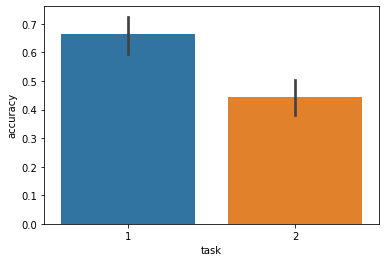

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot mean 
sns.barplot(x= df1.loc[:,'task'], y=df1.loc[:,'accuracy'])
plt.show()

In [45]:
import scipy.stats as stats

t, p = stats.ttest_ind(df_RB.loc[:, 'accuracy'], df_II.loc[:, 'accuracy'])
print(t)
print(p)

4.528098073810435
7.874907862234486e-06


<h3>Subject level analysis function</h3>

In [96]:
def SubjectStats(fileName):
    #read from csv file
    df = pandas.read_csv(fileName, header=None)
    
    #column names
    df.columns = ['trial', 'freq', 'orient', '', 'task', 'category', '', 'response', 'accuracy', 'feedback']
    
    #keep columns with numeric data
    df1 = df.iloc[:,[0, 1, 2, 4, 5, 7, 8, 9]]
    
    #slice rows by task
    df_RB = df1.loc[(df1.loc[:, 'task'] == 1),:]
    df_II = df1.loc[(df1.loc[:, 'task'] == 2),:]
    
    #Get mean and std for accuracy in each task
    acc_mean_RB = [np.mean(np.abs(df_RB.loc[:, 'accuracy']))]
    acc_mean_II = [np.mean(np.abs(df_II.loc[:, 'accuracy']))]
    acc_std_RB = [np.std(np.abs(df_RB.loc[:, 'accuracy']))]
    acc_std_II = [np.std(np.abs(df_II.loc[:, 'accuracy']))]

    #plot mean 
    sns.barplot(x= df1.loc[:,'task'], y=df1.loc[:,'accuracy'])
    plt.show()
    
    return acc_mean_RB, acc_std_RB, acc_mean_II, acc_std_II

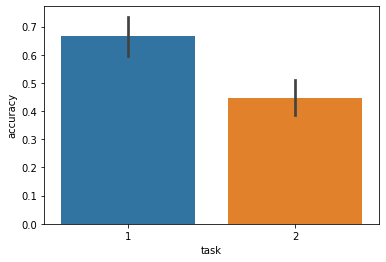

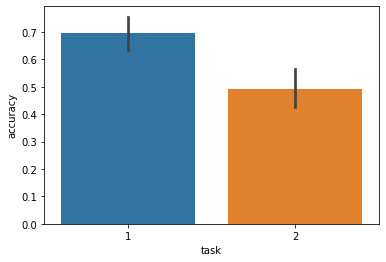

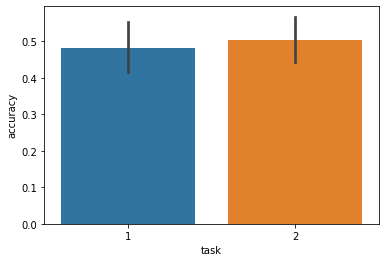

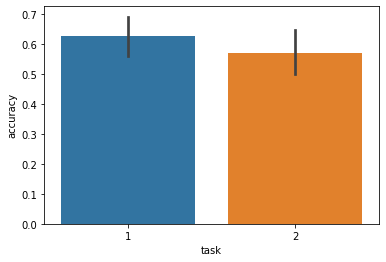

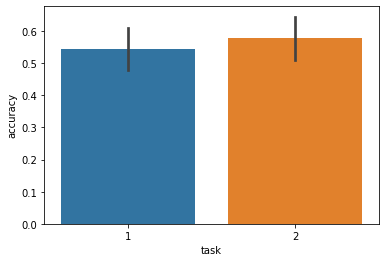

(5, 4)


In [97]:
data = {'acc_mean_RB':[], 'acc_std_RB':[], 'acc_mean_II':[], 'acc_std_II':[]}
df = pandas.DataFrame(data=data)
for i in range(1, 6):
    acc_mean_RB, acc_std_RB, acc_mean_II, acc_std_II = SubjectStats('logfile'+ f"{i:02d}"+'.csv')
    data = {'acc_mean_RB':[acc_mean_RB], 'acc_std_RB':[acc_std_RB], 'acc_mean_II':[acc_mean_II], 'acc_std_II':[acc_std_II]}
    
    df1 = pandas.DataFrame(data = data)
    df = df.append(df1)

print(df.shape)

<h3>Group level analysis</h3>

In [115]:
df = pandas.read_csv('GroupData.csv', header=None)

#column names
df.columns = ['id,', 'trial', 'freq', 'orient', '', 'task', 'category', '', 'response', 'accuracy', 'feedback']
       

print(df.head())

   id,  trial       freq     orient      task  category           response  \
0    1      1  66.276596  83.510083  RB     1         2  response        R   
1    1      2  30.644311  56.233953  RB     1         2  response        R   
2    1      3  30.644311  56.233953  RB     1         2  response        L   
3    1      4  66.823565  37.116590  RB     1         2  response        L   
4    1      5  71.920463  48.187456  RB     1         2  response        L   

   accuracy  feedback  
0         1         1  
1         1         1  
2         0         1  
3         0         1  
4         0         1  


In [116]:
#keep columns with numeric data
df1 = df.iloc[:,[0, 1, 2, 3, 5, 6, 8, 9, 10]]
    
print(df1.head())

   id,  trial       freq     orient  task  category response  accuracy  \
0    1      1  66.276596  83.510083     1         2        R         1   
1    1      2  30.644311  56.233953     1         2        R         1   
2    1      3  30.644311  56.233953     1         2        L         0   
3    1      4  66.823565  37.116590     1         2        L         0   
4    1      5  71.920463  48.187456     1         2        L         0   

   feedback  
0         1  
1         1  
2         1  
3         1  
4         1  


In [117]:
#slice rows by task
df_RB = df1.loc[(df1.loc[:, 'task'] == 1),:]
df_II = df1.loc[(df1.loc[:, 'task'] == 2),:]

#Get mean and std for accuracy in each task
acc_mean =[np.mean(np.abs(df_RB.loc[:, 'accuracy'])), np.mean(np.abs(df_II.loc[:, 'accuracy']))]
acc_std = [np.std(np.abs(df_RB.loc[:, 'accuracy'])), np.std(np.abs(df_II.loc[:, 'accuracy']))]
print(acc_mean)
print(acc_std)

[0.6026026026026026, 0.5174825174825175]
[0.4893594853879594, 0.4996942681104801]


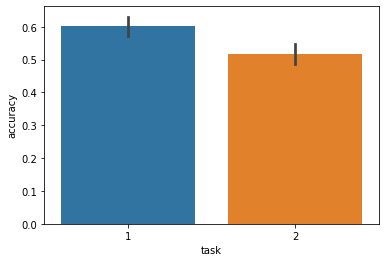

In [118]:
#plot mean accuracy with all subjects 
sns.barplot(x= df1.loc[:,'task'], y=df1.loc[:,'accuracy'])
plt.show()

<h4t>T test</h4>

In [131]:
t, p = stats.ttest_ind(df_RB.loc[:, 'accuracy'], df_II.loc[:, 'accuracy'])
print(t)
print(p)

3.8466390240562895
0.0001235034482973907
